### **Supervised**: `Generalization`

**Definition**: Generalization refers to how well the concepts learned by a machine learning model apply to specific examples not seen by the model when it was learning.

The goal of a good machine learning model is to generalize well from the training data to any data from the problem domain. This allows us to make predictions in the future on data the model has never seen.

There is a terminology used in machine learning when we talk about how well a machine learning model learns and generalizes to new data, namely overfitting and underfitting.

- **Overfitting,** refers to a model that models the training data too well, low bias and high variance.

- **Underfitting,** refers to a model that can neither model the training data nor generalize to new data, high bias and low variance.

- **Good fit,** ideally, we want to select a model at the sweet spot between underfitting and overfitting. This is the goal, but is very difficult to do in practice.

A `fit` refers to how well you approximate a target function. This is good terminology to use in machine learning, because supervised machine learning algorithms seek to approximate the unknown underlying mapping function for the output variables given the input variables.

### **Generalization in** `Classification Model`

Overfitting and underfitting can often be seen from the learning curve of a machine learning model. Learning curves are a graphical representation of a model's performance on the training and validation datasets as the traing progresses, typically with respect to the number of training examples or the number of training iterations (epochs).

You can either use real world data. For this example, we'll use titanic data.

In [1]:
# Import required libraries
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# Load the dataset
data = sns.load_dataset('titanic')
data.loc[:, 'age'] = data['age'].fillna(data['age'].median())

# Split features with target
X = data[['pclass', 'age', 'fare']]
y = data['survived']

In [3]:
data

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,28.0,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
X

,pclass,age,fare
0,3,22.0,7.2500
1,1,38.0,71.2833
2,3,26.0,7.9250
3,1,35.0,53.1000
4,3,35.0,8.0500
...,...,...,...
886,2,27.0,13.0000
887,1,19.0,30.0000
888,3,28.0,23.4500
889,1,26.0,30.0000


Split the dataset into two portions: the training set and the testing set. The training set (seen data) is used to train your machine learning model, while the testing set (unseen data) is used to evaluate its performance.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2, random_state=0, stratify=y)

X_train.shape, X_test.shape

((712, 3), (179, 3))

Define the model, for this example, let's consider a simple classifier like a Decision Tree:

In [7]:
from sklearn.tree import DecisionTreeClassifier

estimator = DecisionTreeClassifier(criterion= 'entropy',random_state=0)


Generate learning curves, it will display how a model's performance changes as you increase the size of the training data.

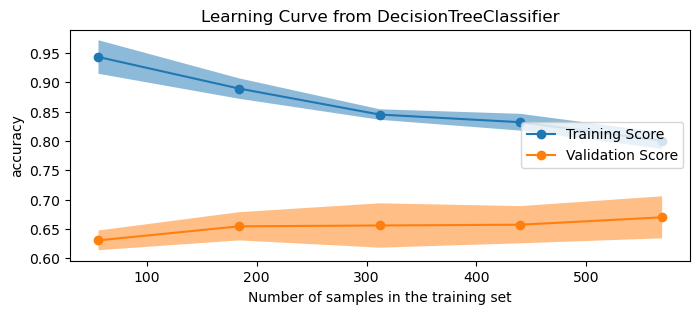

In [24]:
from sklearn.model_selection import LearningCurveDisplay

fig, ax = plt.subplots(figsize=(8, 3))

common_params = {
    'X': X_train,
    'y': y_train,
    'train_sizes': np.linspace(0.1, 1, 5),
    'cv': 5,
    'score_type': 'both',
    'n_jobs': 2,
    'line_kw': {'marker': 'o'},
    'score_name' : 'accuracy'
}

LearningCurveDisplay.from_estimator(estimator, **common_params, ax=ax)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[:2], ['Training Score', 'Validation Score'], loc='center right')
ax.set_title(f'Learning Curve from {estimator.__class__.__name__}')

plt.show()

**Insights**: The training accuracy score remains high regardless of the training set size (over 90%), although there is a minimal decrease. On the other hand, the testing score increases with the size of the training dataset. Indeed, these scores increases until they reach a point where they plateau. However, it is not useful because the gap between the training and testing scores is too large, indicating that the model is overfitting.

Alternatively, you can create a bias-variance plot to visualize the trade-off between bias and variance in machine learning models. This plot helps you understand how your ,odel's complexity impacts its performance. It is often used to explain why a model might be underfitting or overfitting.

In [17]:
Xtrain,Xval,ytrain,yval = train_test_split(X_train,y_train,test_size=.2,random_state=0, stratify=y_train)

Xtrain.shape,Xval.shape

((569, 3), (143, 3))

In [18]:
from mlxtend.evaluate import bias_variance_decomp

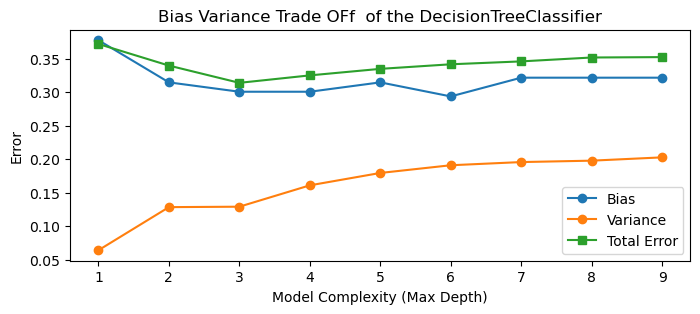

In [22]:
plt.figure(figsize=(8,3))

biases = []
losses = []
variances = []
depths = range(1,10)
for depth in depths:
    estimator = DecisionTreeClassifier(max_depth=depth, criterion='entropy',random_state=42)
    loss, bias, variance = bias_variance_decomp(estimator,Xtrain.values,ytrain.values, Xval.values, yval.values, loss='0-1_loss', random_seed=0)
    
    biases.append(bias)
    losses.append(loss)
    variances.append(variance)

plt.plot(depths,biases,marker = 'o',label='Bias')
plt.plot(depths,variances,marker = 'o',label='Variance')
plt.plot(depths,losses,marker = 's',label='Total Error')

plt.xlabel('Model Complexity (Max Depth)')
plt.ylabel('Error')
plt.title(f'Bias Variance Trade OFf  of the {estimator.__class__.__name__}')
plt.legend()
plt.show()

**Insight**: As you increase the model complexity, bias decreases, and variance increases. The model starts fitting the data more closely, but it becomes more sensitive to variations in the training data. The goal is to find the model complexity at which the total error is minimized. This represents the right balance between bias and variance, where the model generalized well to new data. In this example, the balance condition is achieved when max_depth is 3 levels.

In addition, it is also possible to look at the scalability of the predictive models, we can check the trade-off between increased training time and the cross-validation score.

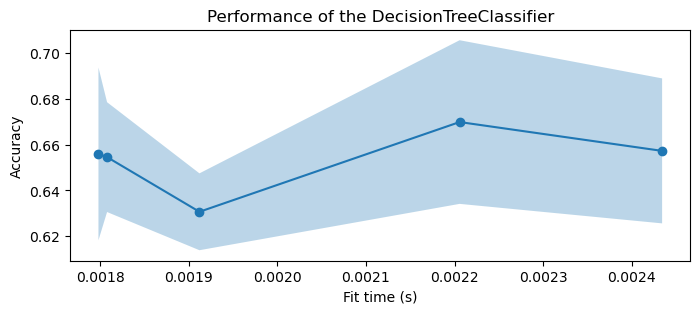

In [23]:
from sklearn.model_selection import learning_curve

# Set figure size
fig, ax = plt.subplots(figsize=(8,3))

# Set the required parameters
common_params = {
    "X": X_train,
    "y": y_train,
    "train_sizes": np.linspace(0.1, 1, 5),
    "cv": 5,
    "return_times": True,
    "random_state": 0
}

# Generate learning curve plot
train_sizes, _, test_scores, fit_times, score_times = learning_curve(estimator, **common_params)

avg_time = fit_times.mean(axis=1)
avg_score = test_scores.mean(axis=1)
std_score = test_scores.std(axis=1)

avg_time_sorted = np.array(sorted(avg_time))
avg_score_sorted = np.array([x for _, x in sorted(zip(avg_time, avg_score))])
std_score_sorted = np.array([x for _, x in sorted(zip(avg_time, std_score))])


ax.plot(avg_time_sorted, avg_score_sorted, "o-")

# Add accuracy error region
ax.fill_between(
    avg_time_sorted,
    avg_score_sorted - std_score_sorted,
    avg_score_sorted + std_score_sorted,
    alpha=0.3
)

# Set title, axis label, and legend
plt.xlabel('Fit time (s)')
plt.ylabel('Accuracy')
plt.title(f'Performance of the {estimator.__class__.__name__}')

# Show the plot
plt.show()

**Insight:** In these plots, we can look for the inflection point foe which the accuracy score does not increase anymore  and only the training time increases. The complexity of the DecisionTreeClassifier at fit time an score increases slowly as the number of samples increases. That is, the model scales much better withlower complexity at fit times above 0.0015 and scores between 0.66 and 0.68.